In [2]:
import sys
sys.path.append('../')

In [3]:
import pennylane as qml 
from pennylane import numpy as np 
import matplotlib.pyplot as plt 
from main import VarFourier
from main import RY_ansatz, Rot_ansatz, ZGR_ansatz

In [47]:
num_qubits = 5

In [48]:
def init_state():
    #qml.AmplitudeEmbedding(features=vecs[:,0], wires=range(num_qubits))
    pass 

In [49]:
num_layers = 1
var_state_class = ZGR_ansatz(num_qubits, num_layers)
#var_state_class = Rot_ansatz(num_qubits,num_layers)
#var_state_class = RY_ansatz(num_qubits,num_layers)
var_state = var_state_class.construct_circuit
num_params = var_state_class.num_params


(<Figure size 6400x600 with 1 Axes>, <Axes: >)

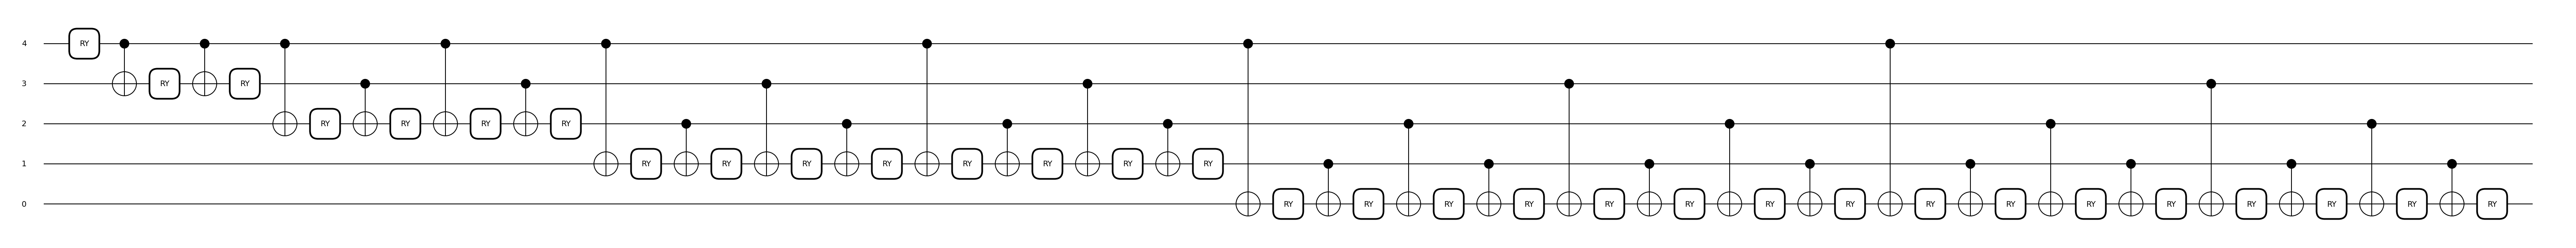

In [50]:
qml.draw_mpl( var_state )( num_params*[0] )

In [59]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

R_varqft = VarFourier( num_qubits,
                    lambda x : -0.5/(np.abs(x-2.5)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-5,
                    xmax=5,
                    var_state  = var_state,
                    init_state = init_state,
                    semi_classical=False
                    )

In [62]:
R_vals, R_vecs = R_varqft.energy_eigens()
R_val = R_vals[0]
R_vec = R_vecs[:,0]
R_vals

array([-2.35017399, -0.08509261, -0.06942908,  0.30127158,  0.44944186,
        1.16876093,  1.33334595,  2.4229993 ,  2.61317823,  4.07610245,
        4.25961215,  6.09667853,  6.29152422,  8.49879089,  8.6902758 ,
       11.26446963, 11.4717419 , 14.40595564, 14.62107101, 17.91119193,
       18.15143551, 21.78896937, 22.05150724, 26.03190761, 26.33191315,
       30.64337268, 30.98682282, 35.62329096, 36.02571836, 40.96325293,
       41.46635584, 46.98456833])

In [68]:
params_init = np.random.randn( num_params )*0.001
#params_pre = params_ground[-1]
#params_ground, energies_ground = varqft.run( np.concatenate((params_pre,np.random.randn(num_qubits)*1e-3)), max_iterations=500, learning_rate=0.5, conv_tol=1e-6 )
R_params_ground, R_energies_ground = R_varqft.run( params_init , max_iterations=300, learning_rate=0.2, conv_tol=1e-6 )

Step:    299, Energy:    -2.344416


In [34]:
#params_init

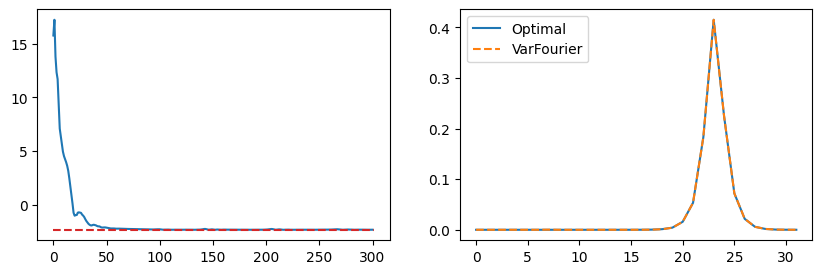

In [69]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( R_energies_ground )
ax[0].hlines( R_val, 0, len(R_energies_ground), colors='tab:red', linestyles='--' ) 

R_ground_state = R_varqft.state( R_params_ground[-1] )

ax[1].plot( np.abs(R_vecs[:,0])**2) 
ax[1].plot( np.abs(R_ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [70]:
abs(np.vdot( R_ground_state, R_vec ))**2

0.9996168634172207

In [71]:
device = qml.device( "lightning.qubit", 
                    wires=num_qubits)

L_varqft = VarFourier( num_qubits,
                    lambda x : -0.5/(np.abs(x+2.5)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-5,
                    xmax=5,
                    var_state  = var_state,
                    init_state = init_state,
                    semi_classical=False
                    )

In [72]:
L_vals, L_vecs = L_varqft.energy_eigens()
L_val = L_vals[0]
L_vec = L_vecs[:,0]
L_vals

array([-2.35017399, -0.08509261, -0.06942908,  0.30127158,  0.44944186,
        1.16876093,  1.33334595,  2.4229993 ,  2.61317823,  4.07610245,
        4.25961215,  6.09667853,  6.29152422,  8.49879089,  8.6902758 ,
       11.26446963, 11.4717419 , 14.40595564, 14.62107101, 17.91119193,
       18.15143551, 21.78896937, 22.05150724, 26.03190761, 26.33191315,
       30.64337268, 30.98682282, 35.62329096, 36.02571836, 40.96325293,
       41.46635584, 46.98456833])

In [73]:
#params_pre = params_ground[-1]
#params_ground, energies_ground = varqft.run( np.concatenate((params_pre,np.random.randn(num_qubits)*1e-3)), max_iterations=500, learning_rate=0.5, conv_tol=1e-6 )
L_params_ground, L_energies_ground = L_varqft.run( params_init , max_iterations=300, learning_rate=0.2, conv_tol=1e-6 )

Step:    299, Energy:    -2.349731


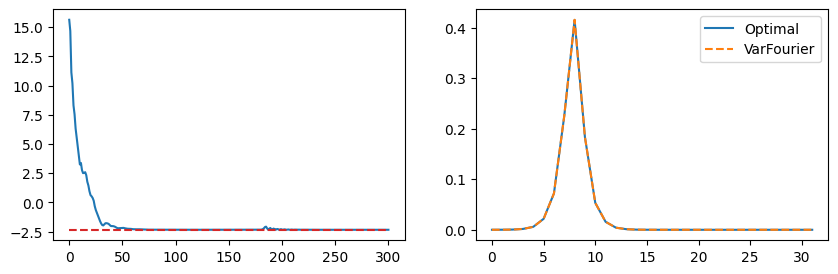

In [75]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( L_energies_ground )
ax[0].hlines( L_val, 0, len(R_energies_ground), colors='tab:red', linestyles='--' ) 

L_ground_state = L_varqft.state( L_params_ground[-1] )

ax[1].plot( np.abs(L_vecs[:,0])**2) 
ax[1].plot( np.abs(L_ground_state)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [56]:
abs(np.vdot( ground_state, vec ))**2

0.9999559583572619

In [57]:
abs(np.vdot( ground_state, excited_state ))**2 

9.79496503905608e-08

In [58]:
abs(np.vdot( excited_state, vec2 ))**2

0.9999989012098754

In [59]:
energies_excited[-1]/energies_ground[-1]

Array(0.24366485, dtype=float32)

In [60]:
vals[1]/vals[0]

0.24365853574453494

In [61]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-10,
                    xmax=10,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = [25,25], 
                    orthoparams= [np.copy(params_ground[-1]),np.copy(params_excited[-1])] 
                    ) 

In [62]:
params_init_ex2 = np.random.randn( num_params )*0.001

params_excited2, energies_excited2 = varqft.run( params_init_ex2, max_iterations=300, learning_rate= 0.1, conv_tol=1e-5)

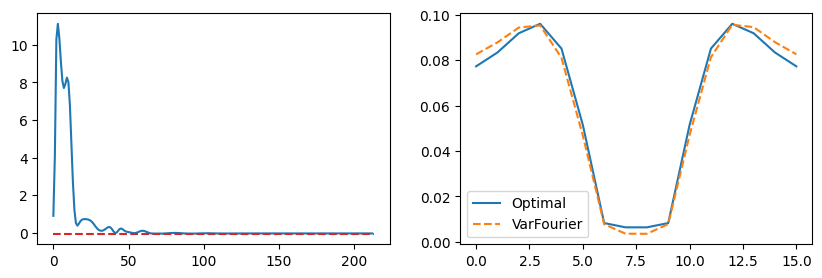

In [63]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited2 )
ax[0].hlines( val3, 0, len(energies_excited2), colors='tab:red', linestyles='--' ) 

excited_state2 = varqft.state( params_excited2[-1] )

ax[1].plot( np.abs(vec3)**2) 
ax[1].plot( np.abs(excited_state2)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [64]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(0.0+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-10,
                    xmax=10,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = [25,25,25], 
                    orthoparams= [np.copy(params_ground[-1]),np.copy(params_excited[-1]),np.copy(params_excited2[-1])] 
                    ) 

In [65]:
params_init_ex3 = np.random.randn( num_params )*0.001

params_excited3, energies_excited3 = varqft.run( params_init_ex3, max_iterations=300, learning_rate= 0.1, conv_tol=1e-5)

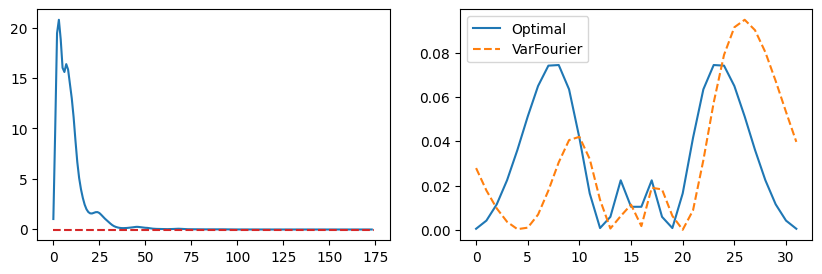

In [89]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited3 )
ax[0].hlines( val3, 0, len(energies_excited3), colors='tab:red', linestyles='--' ) 

excited_state3 = varqft.state( params_excited3[-1] )

ax[1].plot( np.abs(vec4)**2) 
ax[1].plot( np.abs(excited_state3)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

In [90]:
varqft = VarFourier( num_qubits, 
                    lambda x : -0.5/(0.1+np.abs(x)),
                    lambda p : 0.5*p**2,
                    device,
                    xmin=-20,
                    xmax=20,
                    var_state  = var_state, 
                    init_state = init_state, 
                    orthovals  = [25,25,25,25,25], 
                    orthoparams= [np.copy(params_ground[-1]),np.copy(params_excited[-1]),np.copy(params_excited2[-1]), np.copy(params_excited3[-1])] 
                    ) 

In [91]:
params_init_ex4 = np.random.randn( num_params )*0.001

params_excited4, energies_excited4 = varqft.run( params_init_ex4, max_iterations=300, learning_rate= 0.1, conv_tol=1e-5)

/home/ctabares/.virtualenvs/qhack/lib/python3.11/site-packages/pennylane/math/utils.py:227: UserWarning: Contains tensors of types {'autograd', 'jax'}; dispatch will prioritize TensorFlow, PyTorch, and  Jax over Autograd. Consider replacing Autograd with vanilla NumPy.
  warnings.warn(


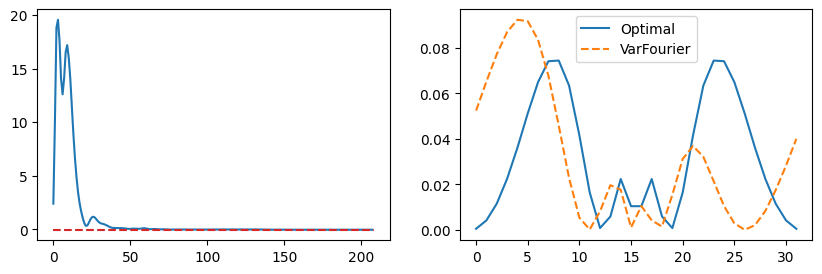

In [93]:
fig, ax = plt.subplots( 1, 2, figsize=(10,3) ) 

ax[0].plot( energies_excited4 )
ax[0].hlines( val4, 0, len(energies_excited4), colors='tab:red', linestyles='--' ) 

excited_state4 = varqft.state( params_excited4[-1] )

ax[1].plot( np.abs(vec4)**2) 
ax[1].plot( np.abs(excited_state4)**2, '--' ) 
ax[1].legend(['Optimal','VarFourier']) 

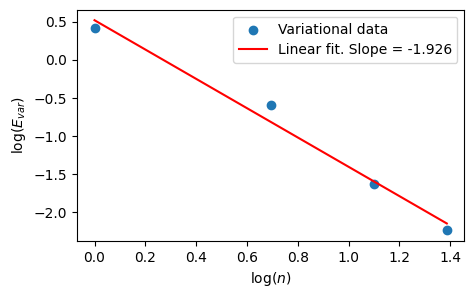

Pendiente = -1.9260088741243795


In [25]:
fig, ax = plt.subplots( 1, 1, figsize=(5,3) ) 

#ax.scatter(1/(np.arange(1,5)**2) , np.abs(vals[0:4]) )
x = np.log(np.arange(1,5))
#y = np.log(np.abs([energies_ground[-1],energies_excited[-1], energies_excited2[-1], energies_excited3[-1]]))
y = np.log(np.abs(vals[0:4]))
ax.scatter(x , y, label = 'Variational data')
#ax.set_xscale("log")
#ax.set_yscale("log")
#ax.hlines( val3, 0, len(energies_excited3), colors='tab:red', linestyles='--' ) 
slope, intercept = np.polyfit(x, y, 1)
y_fit = slope * x + intercept
plt.plot(x, y_fit, color='red', label=f'Linear fit. Slope = {slope:3.3f}')

plt.xlabel('$\log(n)$')
plt.ylabel('$\log(E_{var})$')

plt.legend()
#plt.savefig('../figures/Hydrogen_atom_energies.png')
plt.show()

print(f'Pendiente = {slope}')



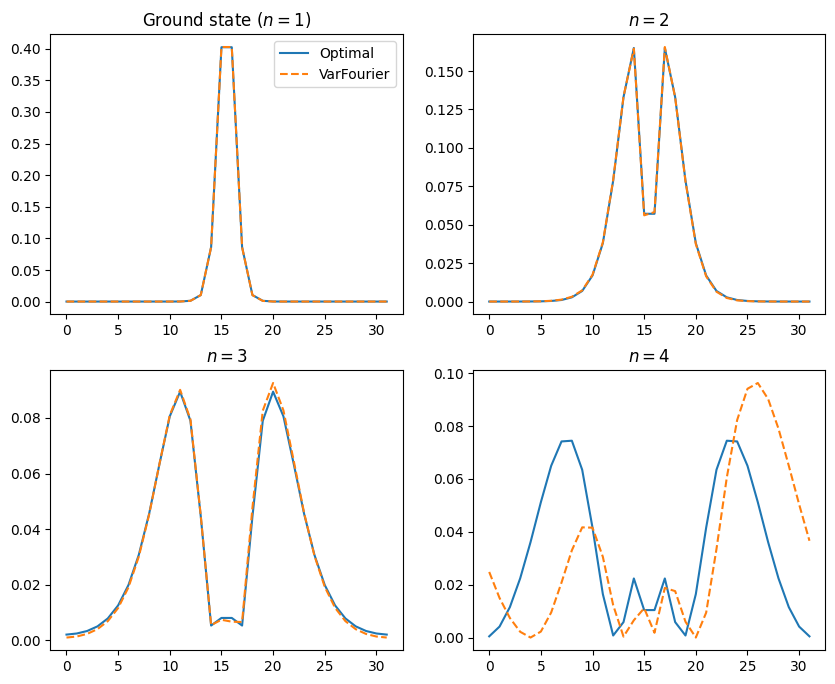

In [87]:
fig, ax = plt.subplots( 2, 2, figsize=(10,8) ) 


ground_state = varqft.state( params_ground[-1] )

ax[0,0].plot( np.abs(vecs[:,0])**2 ) 
ax[0,0].plot( np.abs(ground_state)**2, '--' ) 
ax[0,0].legend(['Optimal','VarFourier']) 
ax[0,0].set_title('Ground state ($n=1$)')

ax[0,1].plot( np.abs(vec2)**2) 
ax[0,1].plot( np.abs(excited_state)**2, '--' )
ax[0,1].set_title('$n=2$')

ax[1,0].plot( np.abs(vec3)**2) 
ax[1,0].plot( np.abs(excited_state2)**2, '--' ) 
ax[1,0].set_title('$n=3$')

ax[1,1].plot( np.abs(vec4)**2) 
ax[1,1].plot( np.abs(excited_state3)**2, '--' ) 
ax[1,1].set_title('$n=4$')

#plt.savefig('../figures/Hydrogen_atom_first4states.png')
plt.show()